<h1><center>INSTALLMENT PAYMENT ANALYSIS</center></h1>

This notebook is to analyse the client's history of paying installments of his previous credits on the basis of the data stored in **installments_payments.csv** file of this dataset. It contains the information about the installments paid by all the clients in the dataset on each of their previously availed credit.

Using this data, we shall try to find the answers to the following questions:
- **Were the installments paid on time?**
    - **What was the delay in payment of the installments?**
    - **Did it ever cross the 90 DPD delay mark (which means that the client is a DEFAULTER)?**
- **Were the installments paid in full (or in fraction)?**
    - **If not, then what fraction of it was usually paid?**

By addressing these questions and analyzing his previos credit payments, we can quantify the behavioural aspects of the client. Moreover, this data can be combined with other records in the dataset to gain a full view of the client's credit profile.

<h2><center>Table of Content</center></h2>

- [1. Libraries and Constants](#1)
- [2. Getting the Tables](#2)
- [3. Analyzing installments_payments.csv Table](#3)
    - [3.1 Table Information](#3.1)
    - [3.2 Missing Values](#3.2)
    - [3.3 Univariate Analysis](#3.3)
        - [3.3.1 Analyzing the SK_ID_PREV Variable](#3.3.1)
        - [3.3.2 Analyzing the SK_ID_CURR Variable](#3.3.2)
        - [3.3.3 Analyzing the NUM_INSTALMENT_VERSION Variable](#3.3.3)
        - [3.3.4 Analyzing the NUM_INSTALMENT_NUMBER Variable](#3.3.4)
        - [3.3.5 Analyzing the DAYS_INSTALMENT Variable](#3.3.5)
        - [3.3.6 Analyzing the DAYS_ENTRY_PAYMENT Variable](#3.3.6)
        - [3.3.7 Analyzing the AMT_INSTALMENT Variable](#3.3.7)
        - [3.3.8 Analyzing the AMT_PAYMENT Variable](#3.3.8)
    - [3.4 Multi-Variate Analysis](#3.4)
- [4. Getting the Resultant Feature Space](#4)
    - [4.1 Saving the Feature Space](#4.1)

<h2><div id="1">1 : Libraries and Constants</div></h2>

In [1]:
import os

In [2]:
# Going two folders back from the CWD i.e. EDA:

os.chdir("..")
os.chdir("..")

In [3]:
# Now we are in the actual root directory of the project:

ROOT_DIR = os.getcwd()
ROOT_DIR

'C:\\Users\\KIIT\\Desktop\\Home Credit Default Risk'

In [4]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import src.eda.visualization as plotter
import src.eda.tabular as tab
import src.fe.installments as inst

In [6]:
warnings.filterwarnings("ignore")

<h2><div id="2">2 : Getting the Tables</div></h2>

In [7]:
instal = pd.read_csv(
    os.path.join(ROOT_DIR,"data","original","installments_payments.csv")
)
instal.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


<h2><div id="3">3 : Analyzing installments_payments.csv File</div></h2>

<h3><div id="3.1">3.1 : Table Information</div></h3>

In [8]:
instal.shape

(13605401, 8)

There are 13,605,401 records and 8 attributes in the file.

In [9]:
instal.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

Out of 8 attributes in the file, *SK_ID_CURR* and *SK_ID_PREV* uniquely identify the records in the *application_train.csv* and *previous_application.csv* files respectively.

Because these are hash values, these are not subject to multivariate analysis with other variables.However, we can use them to calculate the number of previous applications (using SK_ID_PREV attribute) and number of clients (using SK_ID_CURR) that have availed the installment-based cash credit.

In [10]:
instal.dtypes

SK_ID_PREV                  int64
SK_ID_CURR                  int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER       int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtype: object

Since there are no attributes of the type *object*, it seems that there may be no categorical variables in the table. However, it is possible that the attributes of the type *int64* may be categorical expressed as numbers.

The attributes *SK_ID_PREV* and *SK_ID_CURR* are hash values, so they are ruled out. Only *NUM_INSTALMENT_NUMBER* is there to be checked, and this shall be done by performing the [*univariate analysis* of the variable](#3.3.3).

<h3><div id="3.2">3.2 : Missing Values</div></h3>

In [11]:
tab.get_missing_values(instal)

,Column,Missing Values,Missing Values by %
0,SK_ID_PREV,0,0.000
1,SK_ID_CURR,0,0.000
2,NUM_INSTALMENT_VERSION,0,0.000
3,NUM_INSTALMENT_NUMBER,0,0.000
4,DAYS_INSTALMENT,0,0.000
5,DAYS_ENTRY_PAYMENT,2905,0.021
6,AMT_INSTALMENT,0,0.000
7,AMT_PAYMENT,2905,0.021


As per the data above, 2905 of the records do not contain any information about how many days ago the installment was paid. Coincidentally, the number of records that do not contain any information about how much amount was paid is also 2905.

To establish the fact that these 2905 are *UNRECEIVED* installments, the number number of NaN in values in both the columns (DAYS_ENTRY_PAYMENT and AMT_PAYMENT) have to be same.

In [12]:
unpaid= instal[
    instal["DAYS_ENTRY_PAYMENT"].isna()
]
unpaid.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
3764207,1531600,103793,1.0,7,-668.0,NaN,49741.020,NaN
3764208,1947105,159974,1.0,24,-36.0,NaN,22849.515,NaN
3764209,1843773,167270,1.0,22,-20.0,NaN,48092.355,NaN
3764210,1691592,192536,1.0,5,-2561.0,NaN,7675.425,NaN
3764211,1531299,157088,0.0,11,-1847.0,NaN,67.500,NaN


In [13]:
print("Number of records with DAYS_ENTRY_PAYMENT=NaN\t: ", unpaid["DAYS_ENTRY_PAYMENT"].isna().count())
print("Number of records with AMT_INSTALMENT=NaN\t: ", unpaid["AMT_INSTALMENT"].isna().count())

Number of records with DAYS_ENTRY_PAYMENT=NaN	:  2905
Number of records with AMT_INSTALMENT=NaN	:  2905


Since the number of missing values in both the columns is same, we can establish the fact that these records indeed belong to the category of *UNRECEIVED* installments.

<h3><div id="3.3">3.3 : Univariate Analysis</div></h3>

<h4><div>3.3.1 : Analyzing SK_ID_PREV Variable</div></h4>

In [14]:
len(list(instal["SK_ID_PREV"].unique()))

997752

Going by the description, a person may have availed more than one credits in his lifetime. However, not every person may have availed the same type of credit. And there may borrowers who have never even availed the type of credit mentioned here.

<h4><div id="3.3.2">3.3.2 : Analyzing SK_ID_CURR Variable</div></h4>

In [15]:
len(list(instal["SK_ID_CURR"].unique()))

339587

We can see that a total of 3,39,587 people have opted for Installment Payments, which is only a fraction of all the borrower. Therefore, the results of this analysis mad not be as applicable to the person who hasn't even availed the load.

<h4><div id="3.3.3">3.3.3 : Analyzing NUM_INSTALMENT_VERSION Variable</div></h4>

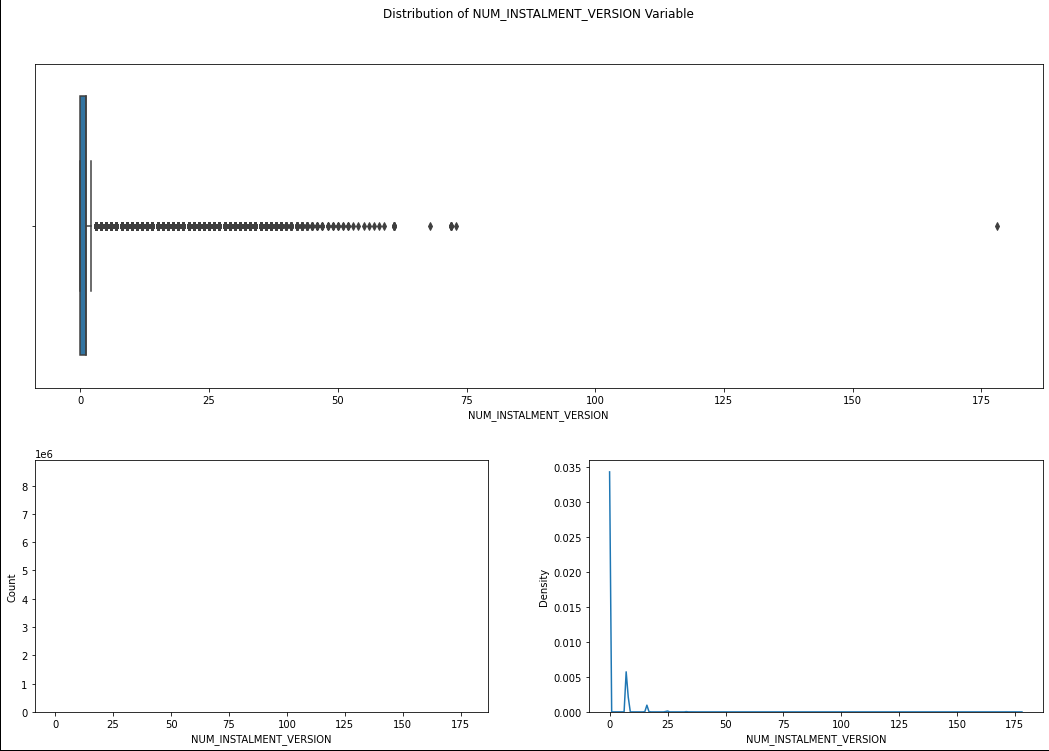

In [16]:
plotter.numeric_distribution(
    title = "Distribution of NUM_INSTALMENT_VERSION Variable",
    data = instal,
    num_col = "NUM_INSTALMENT_VERSION"
)

In [17]:
instal["NUM_INSTALMENT_VERSION"].unique()

array([  1.,   0.,   2.,   4.,   3.,   5.,   7.,   8.,   6.,  13.,   9.,
        21.,  22.,  12.,  17.,  18.,  11.,  14.,  34.,  33.,  19.,  16.,
        15.,  10.,  26.,  27.,  20.,  25.,  23.,  24.,  31.,  32.,  28.,
        35.,  29.,  30.,  43.,  39.,  40.,  36.,  41.,  42.,  37.,  38.,
        68.,  44.,  45.,  46., 178.,  52.,  51.,  53.,  54.,  49.,  50.,
        58.,  57.,  55.,  56.,  48.,  47.,  72.,  59.,  73.,  61.])

It seems that the variable is not only a discrete variable, but the range of values possible for this feature is also narrow. There is a chance that the variable *may be* categorical.

<h4><div id="3.3.4">3.3.4 : Analyzing NUM_INSTALMENT_NUMBER Variable</div></h4>

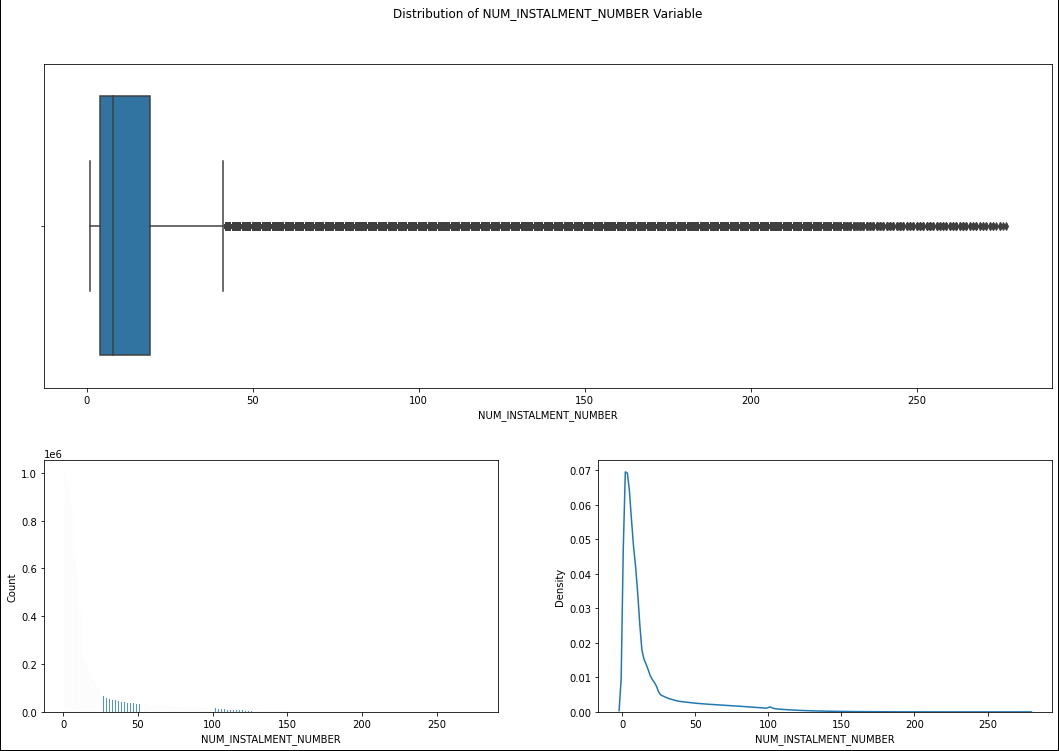

In [18]:
plotter.numeric_distribution(
    title = "Distribution of NUM_INSTALMENT_NUMBER Variable",
    data = instal,
    num_col = "NUM_INSTALMENT_NUMBER"
)

<h4><div id="3.3.5">3.3.5 : Analyzing DAYS_INSTALMENT Variable</div></h4>

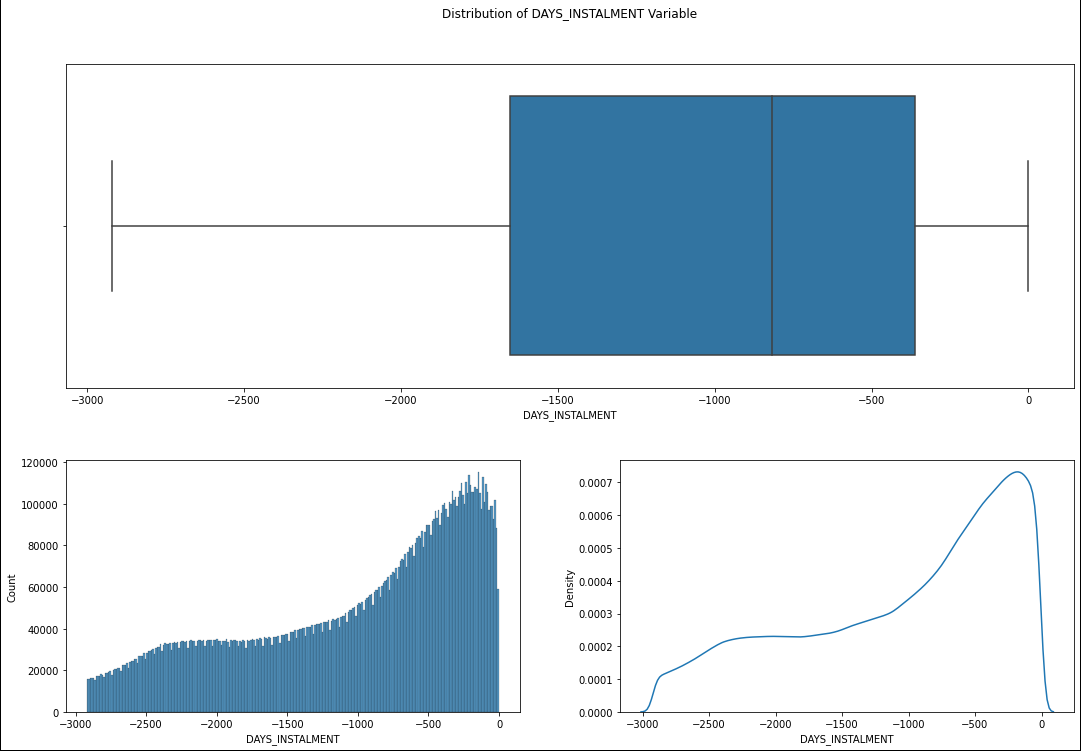

In [19]:
plotter.numeric_distribution(
    title = "Distribution of DAYS_INSTALMENT Variable",
    data = instal,
    num_col = "DAYS_INSTALMENT"
)

<h4><div id="3.3.6">3.3.6 : Analyzing DAYS_ENTRY_PAYMENT Variable</div></h4>

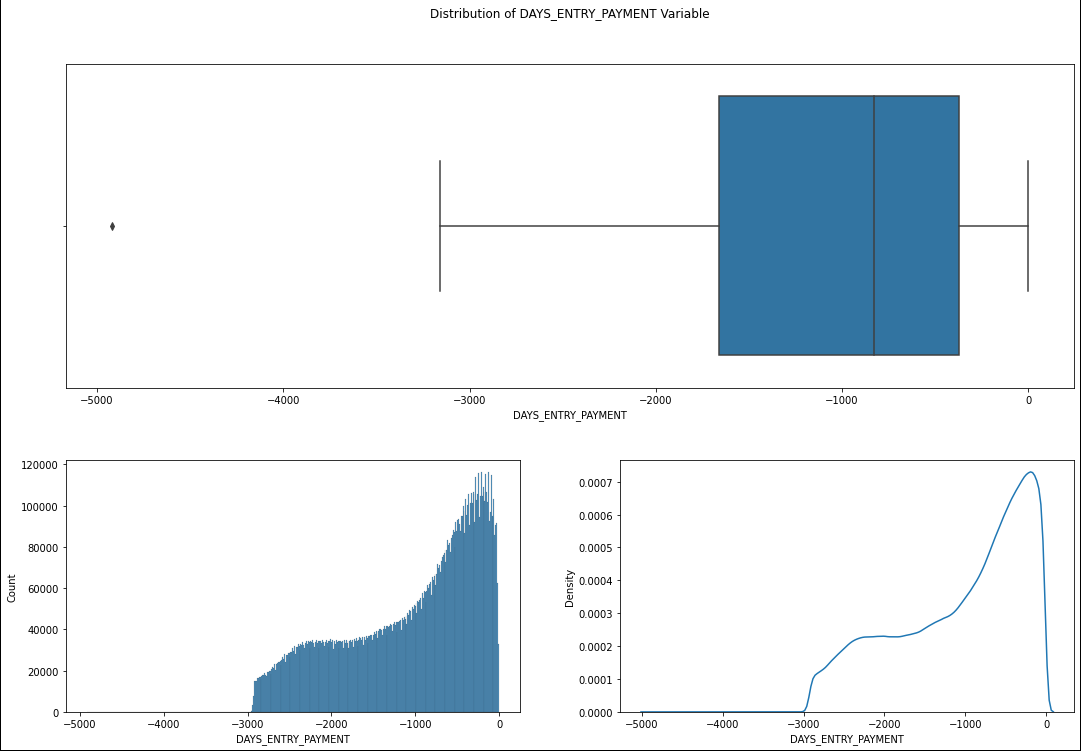

In [20]:
plotter.numeric_distribution(
    title = "Distribution of DAYS_ENTRY_PAYMENT Variable",
    data = instal,
    num_col = "DAYS_ENTRY_PAYMENT"
)

<h4><div id="3.3.7">3.3.7 : Analyzing AMT_INSTALMENT Variable</div></h4>

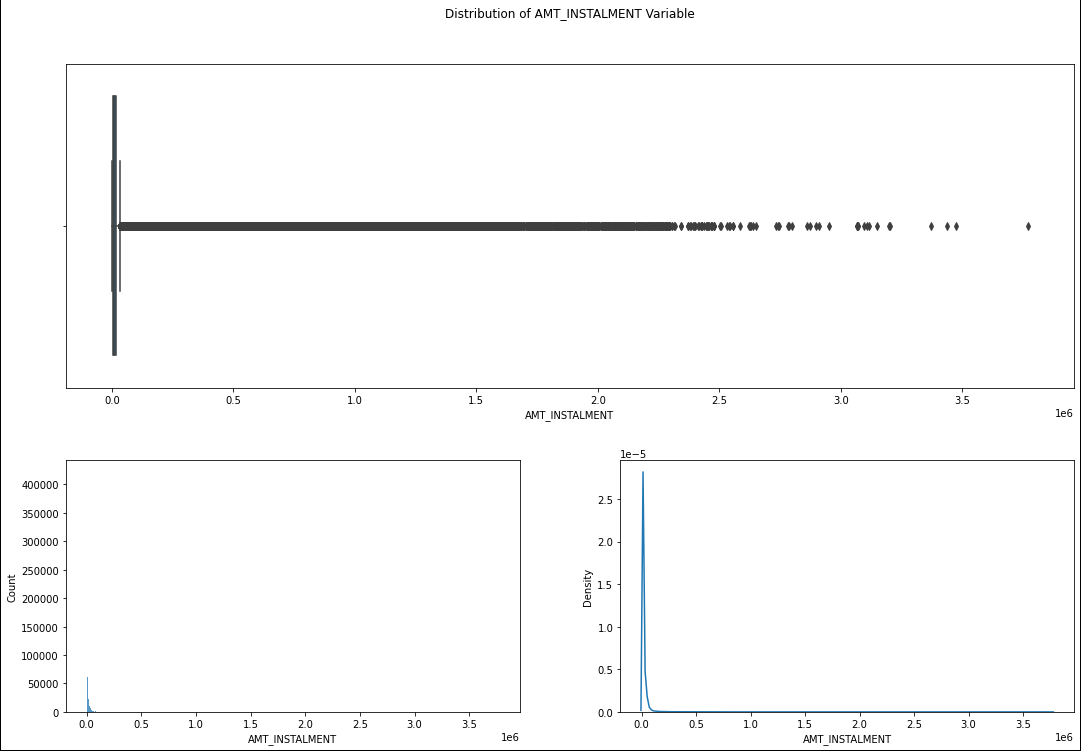

In [21]:
plotter.numeric_distribution(
    title = "Distribution of AMT_INSTALMENT Variable",
    data = instal,
    num_col = "AMT_INSTALMENT"
)

<h4><div id="3.3.8">3.3.8 : Analyzing AMT_PAYMENT Variable</div></h4>

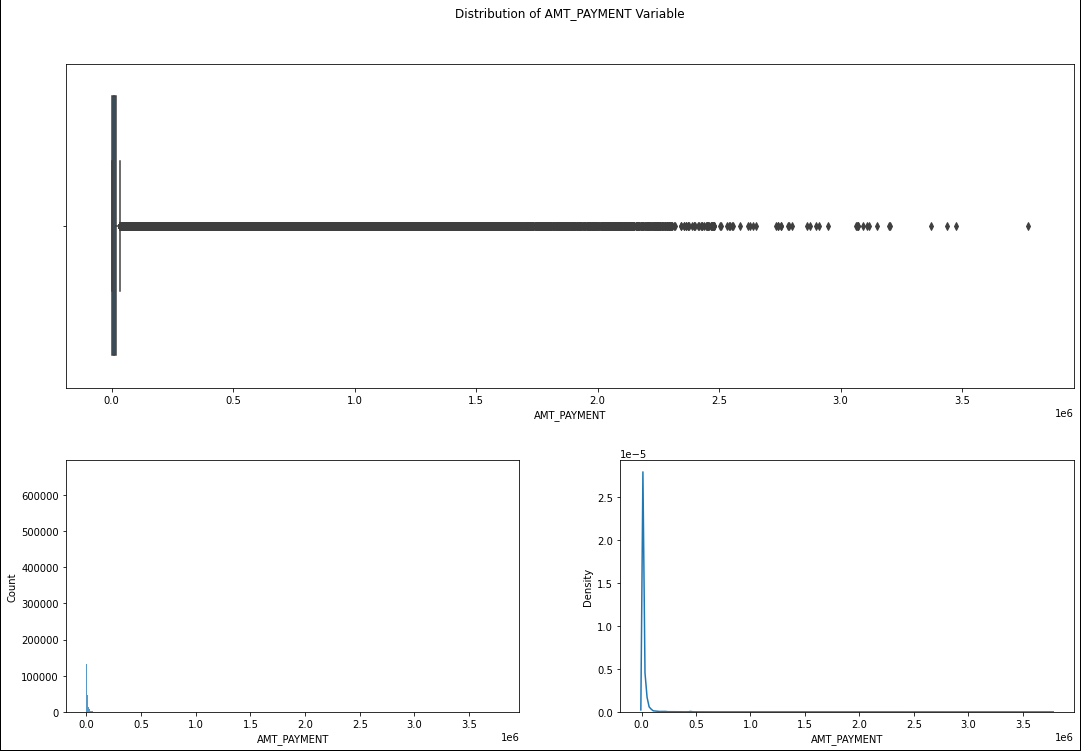

In [22]:
plotter.numeric_distribution(
    title = "Distribution of AMT_PAYMENT Variable",
    data = instal,
    num_col = "AMT_PAYMENT"
)

<h3><div id="3.4">3.4 : Multivariate Analysis</div></h3>

We have performed analysis on the attributes individually. But there's a chance that the variables may be related to each other. This may cause problems for some ML models that are sensitive to *multi-collinearity*. It is therefore reasonable to have a look  at the **correlation** between all the variables and try to find the *reasons* behind high-magnitude correlations (if present).

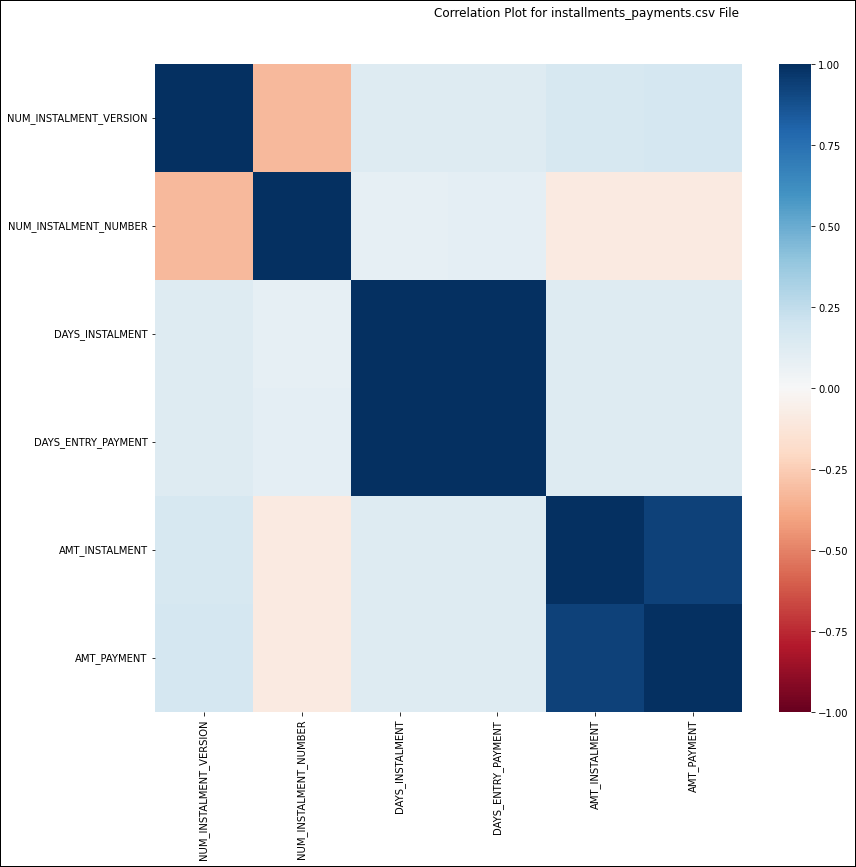

In [23]:
plotter.plot_num_num_corr(
    title = "Correlation Plot for installments_payments.csv File",
    data = instal.iloc[:, 2:]
)

We can observe that the correlation between most of the variables is very less (magnitude <0.2). As for the other values:
* The values in the diagonal (from top-left to bottom-right) shall always be 1, since *any variable is 100% correlated with itself*.
* The attributes **DAYS_INSTALMENT** and **DAYS_ENTRY_PAYMENT** are *very highly* correlated. The reason is that the installments are usually paid around the due date only.
* The attributes **AMT_INSTALMENT** and **AMT_PAYMENT** are *very highly* correlated. The reason is that the amount actually paid as installment is very close to what it is *supposed* to be paid. And as the *payable* amount increases, so does the *actually paid*. The correlation is due to this simple reason instead of a complex one.

Based on the reasons as stated above, we can combine the correlated features through *arithmetic computations*. The reason behind combining is *not the correlation but the cause behind that correlation*. Since these attributes have the **same units of measurement** and the same **interval scale**, we can *arithmetically* combine the highly correlated attributes and get the new *quantitative* features.

<h2><div id="4">4 : Getting the Resultant Feature Space</div></h2>

Having worked on all the variables, we can observe that there are many outliers in the table (outside the bounds [ 1.5Q1, 1.5Q3 ]). This can be inferred from the **Box and Whisker Plots** of various numeric columns (as given above). These outliers have the capacity to affect the feature aggregation.

The table with new features must be aggregated over the **SK_ID_PREV** column. This is to obtain the feature space that is specific to the *previous applications* of the client (which also contains the same SK_ID_PREV column). For feature aggregation using *groupby* method:
* We do not choose the **Mean** as the aggregation criteria because it can be *heavily* influenced by outliers.
* We can choose **Mode** as the aggregation, but this method is best suited for data that is *ordinal/categorical*. Our data is numerical.
* **Median** seems to be the best method in this case, since it works on numerical data and also handles outliers better than the *mean* of the distribution.
* Even from a behavioral point of view, it is possible that a person may not have been able to pay one installment on time due to some reason. This is an *oulier* situation which can be handled by Median.

In [24]:
instal_fs = inst.get_features(instal)
instal_fs.head()

,SK_ID_CURR,INST_PAY_RATIO,INST_DAYS_DELAYED
SK_ID_PREV,,,
1000001,158271,1.0,-16.0
1000002,101962,1.0,-15.0
1000003,252457,1.0,-15.0
1000004,260094,1.0,-19.0
1000005,176456,1.0,-7.0


<h3><div id="4.1">4.1 : Saving the Feature Space</div></h3>

The installments data, having undergone *Feature Selection* and *Feature Aggregation* to generate the final feature space, is saved for later use. This feature space is ready to be merged with the *organization's previous application records* over the *SK_ID_PREV* column.

In [25]:
instal_fs.to_csv(
    os.path.join(ROOT_DIR,"data","generated","installments.csv")
)